In [1]:
from inversemfcc import InverseMfcc
import librosa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
y,sr = librosa.load('happy.wav',sr=16000)
imfcc = InverseMfcc(y, sr)
imfcc.play_original()

In [3]:
##### 默认参数 #######
n_mfcc = 20
n_mel = 128
n_fft = 2048
hop_length = int(0.25 * n_fft)
win_length = int(1 * n_fft)

imfcc.modify_parameters(hop_length=hop_length,n_mfcc=n_mfcc,n_mel=n_mel,n_fft=n_fft,win_length=win_length)
imfcc.transform()
imfcc.play_transformed()

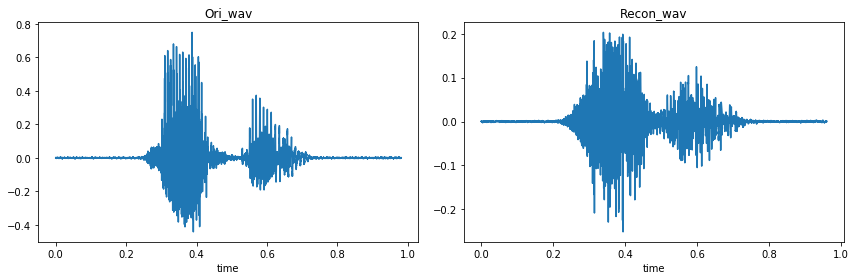

In [4]:
###### 重构波形对比 ######
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(np.arange(0, len(y))/sr, y)
plt.title('Ori_wav')
plt.xlabel("time")

plt.subplot(122)
plt.plot(np.arange(0, len(imfcc.recon))/sr, imfcc.recon)
plt.title('Recon_wav')
plt.xlabel("time") 

plt.tight_layout()

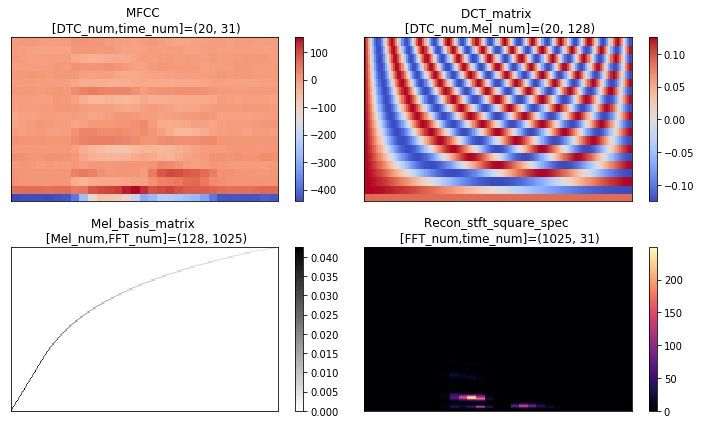

In [12]:
#### MFCC 计算过程中的 矩阵和谱 可视化####
plt.figure(figsize=(10, 6))

plt.subplot(221)
librosa.display.specshow(imfcc.mfcc)
plt.title('MFCC \n [DTC_num,time_num]='+str(imfcc.mfcc.shape))
plt.colorbar()

plt.subplot(222)
librosa.display.specshow(imfcc.dct_martrix)
plt.title('DCT_matrix \n [DTC_num,Mel_num]='+str(imfcc.dct_martrix.shape))
plt.colorbar()

plt.subplot(223)
librosa.display.specshow(imfcc.mel_basis,cmap='gray_r')
plt.title('Mel_basis_matrix \n [Mel_num,FFT_num]='+str(imfcc.mel_basis.shape))
plt.colorbar()

plt.subplot(224)
librosa.display.specshow(imfcc.sequre_spec)
plt.title('Recon_stft_square_spec \n [FFT_num,time_num]='+str(imfcc.sequre_spec.shape))
plt.colorbar() 

plt.tight_layout()

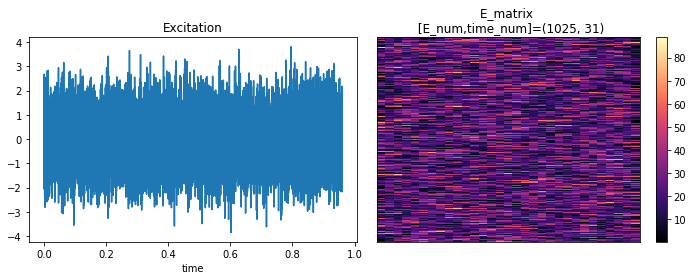

In [6]:
#### 白噪声提供相位信息，虚部，为了 istft####### 
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(np.arange(0, len(imfcc.excitation))/sr, imfcc.excitation)
plt.title('Excitation')
plt.xlabel("time") 

plt.subplot(122)
librosa.display.specshow(imfcc.excitation_spec)
plt.title('E_matrix \n [E_num,time_num]='+str(imfcc.excitation_spec.shape))
plt.colorbar()

plt.tight_layout()

In [7]:
##### 对重构的语音，计算新的MFCC #######
re_wav = imfcc.recon
imfcc_re = InverseMfcc(re_wav, sr)
imfcc_re.play_original()

In [8]:
imfcc_re.modify_parameters(hop_length=hop_length,n_mfcc=n_mfcc,n_mel=n_mel,n_fft=n_fft,win_length=win_length)
imfcc_re.transform()
imfcc_re.play_transformed()

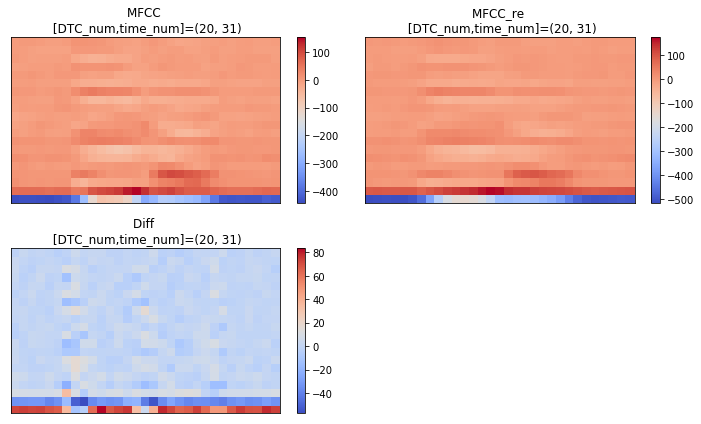

In [20]:
plt.figure(figsize=(10, 6))

plt.subplot(221)
librosa.display.specshow(imfcc.mfcc)
plt.title('MFCC \n [DTC_num,time_num]='+str(imfcc.mfcc.shape))
plt.colorbar()

plt.subplot(222)
librosa.display.specshow(imfcc_re.mfcc)
plt.title('MFCC_re \n [DTC_num,time_num]='+str(imfcc_re.mfcc.shape))
plt.colorbar()

diff = imfcc.mfcc - imfcc_re.mfcc
plt.subplot(223)
librosa.display.specshow(diff)
plt.title('Diff \n [DTC_num,time_num]='+str(diff.shape))
plt.colorbar()

plt.tight_layout()